In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# L6 - 3 ქულა

In [33]:
earthquakes_df = pd.read_csv('Earthquakes_database.csv')

earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], errors='coerce')
earthquakes_df['Year'] = earthquakes_df['Date'].dt.year
earthquakes_df['Month'] = earthquakes_df['Date'].dt.month
earthquakes_df['Day'] = earthquakes_df['Date'].dt.day

earthquakes_df_cleaned = earthquakes_df.dropna(axis=1, how='all')

earthquakes_df_cleaned.to_csv('cleaned_earthquakes.csv', index=False)

print(earthquakes_df_cleaned.head())

        Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Horizontal Error  \
0                     NaN        6.0             MW  ...               NaN   
1                     NaN        5.8             MW  ...               NaN   
2                     NaN        6.2             MW  ...               NaN   
3                     NaN        5.8             MW  ...               NaN   
4                     NaN        5.8             MW  ...               NaN   

   Root Mean Square            ID  Source  Location Sour

# L7 - 3 ქულა

In [5]:
earthquakes_df_cleaned['Magnitude Category'] = pd.cut(earthquakes_df_cleaned['Magnitude'], 
                                                      bins=[0, 5, 7, 10], 
                                                      labels=["Low", "Medium", "High"])
earthquakes_df_cleaned.to_csv('categorized_earthquakes.csv', index=False)
print(earthquakes_df_cleaned.head())

        Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Root Mean Square  \
0                     NaN        6.0             MW  ...               NaN   
1                     NaN        5.8             MW  ...               NaN   
2                     NaN        6.2             MW  ...               NaN   
3                     NaN        5.8             MW  ...               NaN   
4                     NaN        5.8             MW  ...               NaN   

             ID  Source  Location Source  Magnitude Sour

# L9 – 3 ქულა

In [16]:
melted_df = pd.melt(earthquakes_df_cleaned, id_vars=['Date'], value_vars=['Latitude', 'Longitude'])

if not melted_df.duplicated(subset=['Date', 'variable']).any():
    pivoted_df = melted_df.pivot(index='Date', columns='variable', values='value')
else:
    melted_df = melted_df.groupby(['Date', 'variable']).mean().reset_index()
    pivoted_df = melted_df.pivot(index='Date', columns='variable', values='value')

print(melted_df.head())
print(pivoted_df.head())


        Date   variable    value
0 1965-01-02   Latitude   19.246
1 1965-01-02  Longitude  145.616
2 1965-01-04   Latitude    1.863
3 1965-01-04  Longitude  127.352
4 1965-01-05   Latitude  -20.579
variable    Latitude  Longitude
Date                           
1965-01-02    19.246    145.616
1965-01-04     1.863    127.352
1965-01-05   -20.579   -173.972
1965-01-08   -59.076    -23.557
1965-01-09    11.938    126.427


# L10 - ქულა

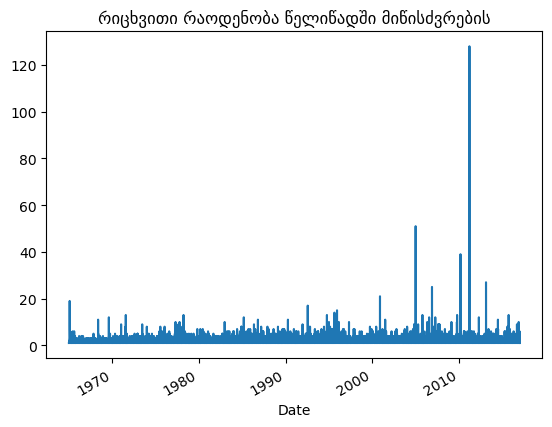

In [34]:
# ხაზოვანი დიაგრამა

plt.figure()
earthquakes_df_cleaned['Date'].value_counts().sort_index().plot(kind='line')
plt.title('რიცხვითი რაოდენობა წელიწადში მიწისძვრების')
plt.show()

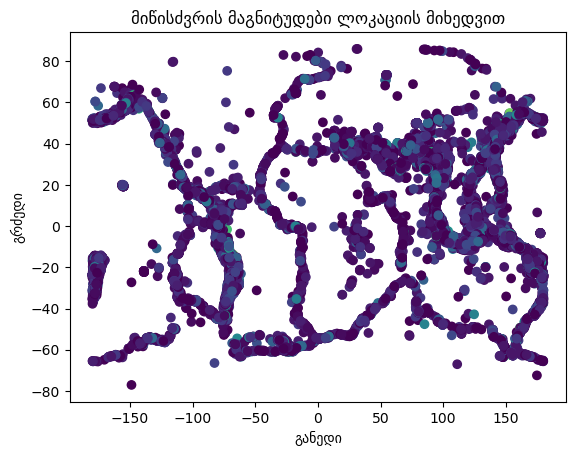

In [41]:
# გაფანტულობის დიაგრამა


plt.figure()
plt.scatter(earthquakes_df_cleaned['Longitude'], earthquakes_df_cleaned['Latitude'], c=earthquakes_df_cleaned['Magnitude'])
plt.title('მიწისძვრის მაგნიტუდები ლოკაციის მიხედვით')
plt.xlabel('განედი')
plt.ylabel('გრძედი')
plt.show()

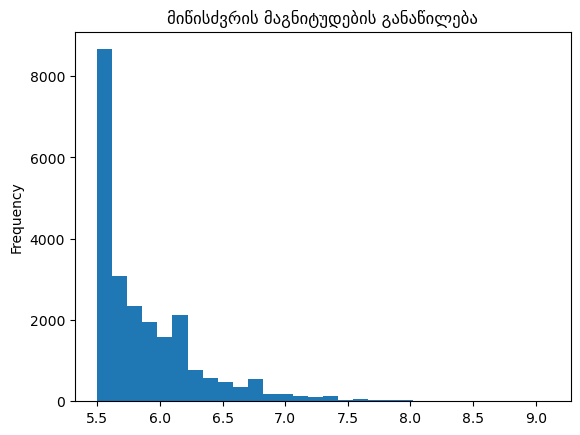

In [38]:
# ჰისტოგრამა
plt.figure()
earthquakes_df_cleaned['Magnitude'].plot(kind='hist', bins=30)
plt.title('მიწისძვრის მაგნიტუდების განაწილება')
plt.show()

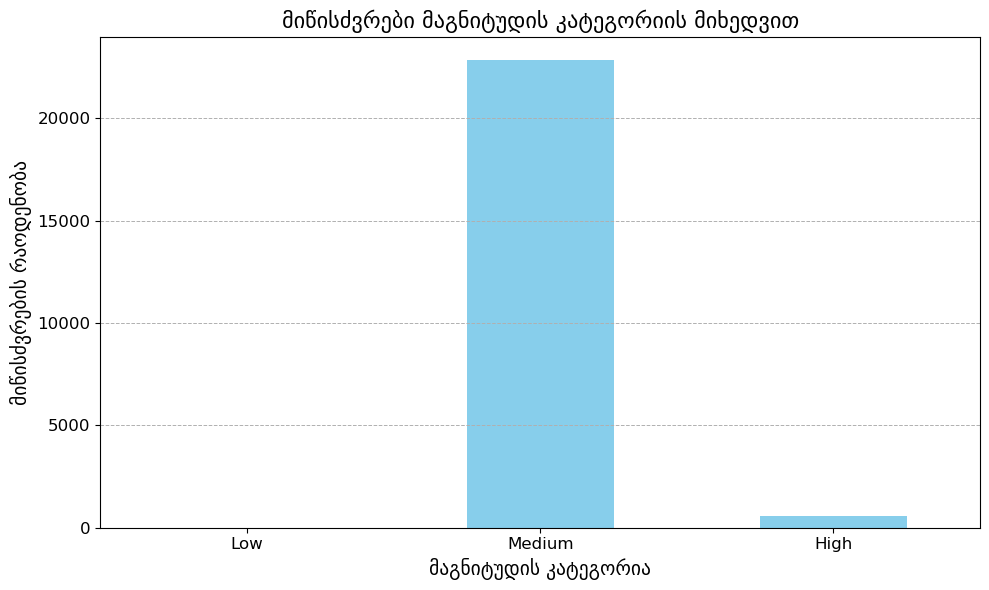

In [40]:
# სვეტოვანი დიაგრამა

earthquakes_df_cleaned['Magnitude Category'] = pd.cut(earthquakes_df_cleaned['Magnitude'], 
                                                      bins=[0, 5, 7, 10], 
                                                      labels=["Low", "Medium", "High"])

plt.figure(figsize=(10, 6))
earthquakes_df_cleaned['Magnitude Category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('მიწისძვრები მაგნიტუდის კატეგორიის მიხედვით', fontsize=16)
plt.xlabel('მაგნიტუდის კატეგორია', fontsize=14)
plt.ylabel('მიწისძვრების რაოდენობა', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# L11 - 2 ქულა

In [31]:
earthquakes_df_cleaned['Year-Month'] = earthquakes_df_cleaned['Date'].dt.to_period('M')

monthly_counts = earthquakes_df_cleaned.resample('M', on='Date').size()

print(earthquakes_df_cleaned.head())
print(monthly_counts.head())

        Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Horizontal Distance  \
0                     NaN        6.0             MW  ...                  NaN   
1                     NaN        5.8             MW  ...                  NaN   
2                     NaN        6.2             MW  ...                  NaN   
3                     NaN        5.8             MW  ...                  NaN   
4                     NaN        5.8             MW  ...                  NaN   

   Horizontal Error  Root Mean Square 